<a href="https://colab.research.google.com/github/Gihanibhagya/Descriptive-Analysis/blob/main/Machine_Learning_Model_Deployment_with_Streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis and Preprocessing**

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float

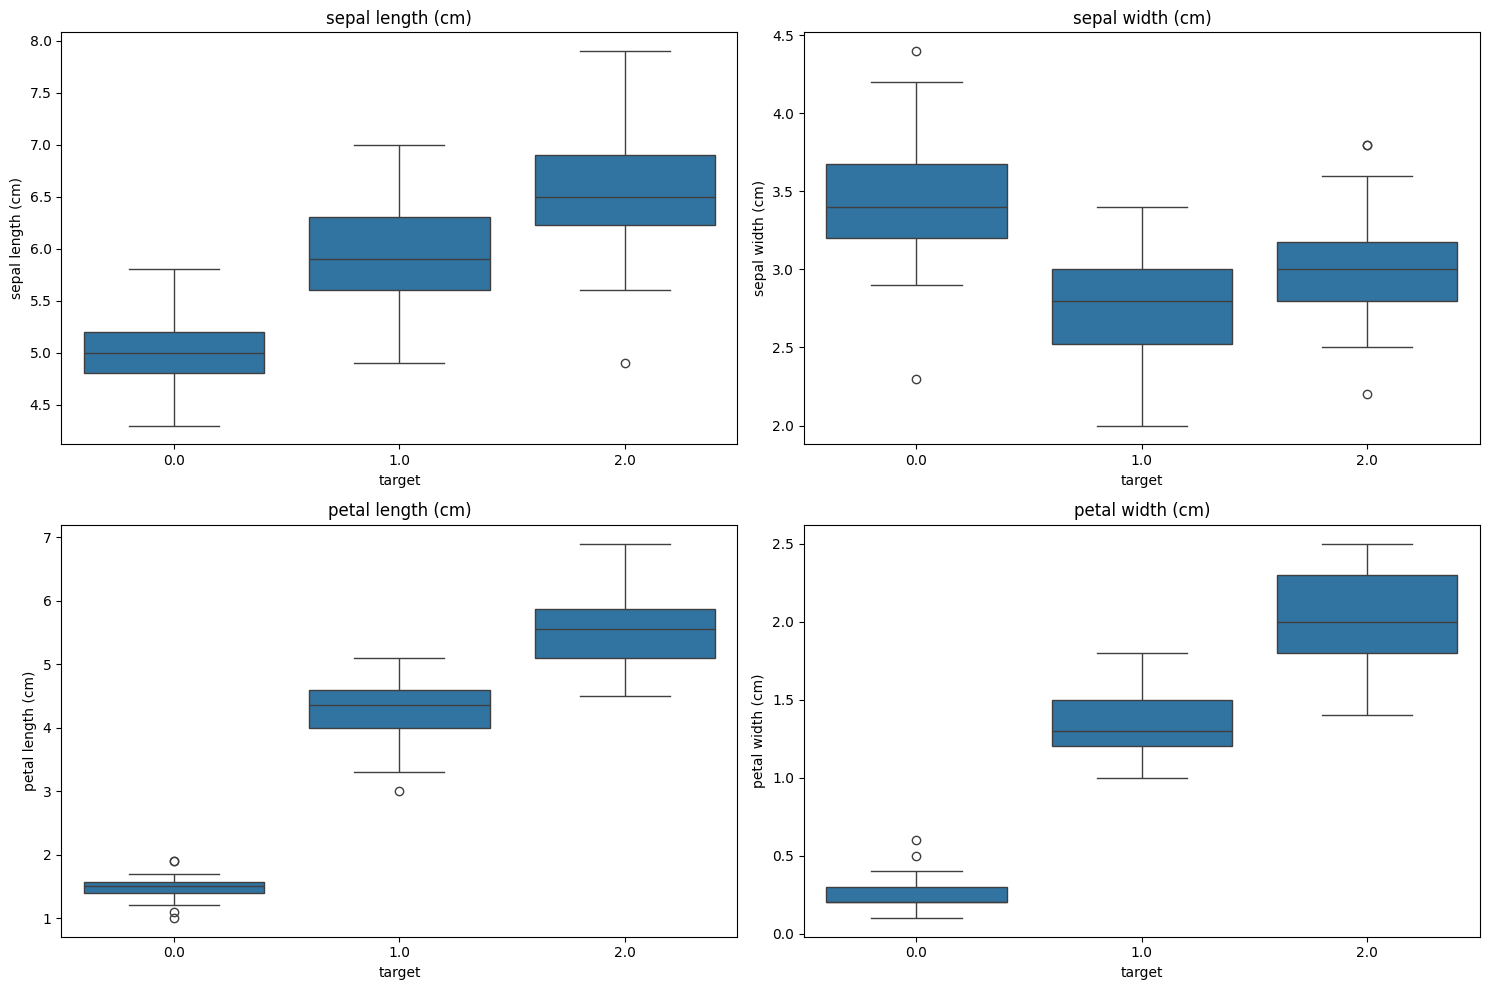

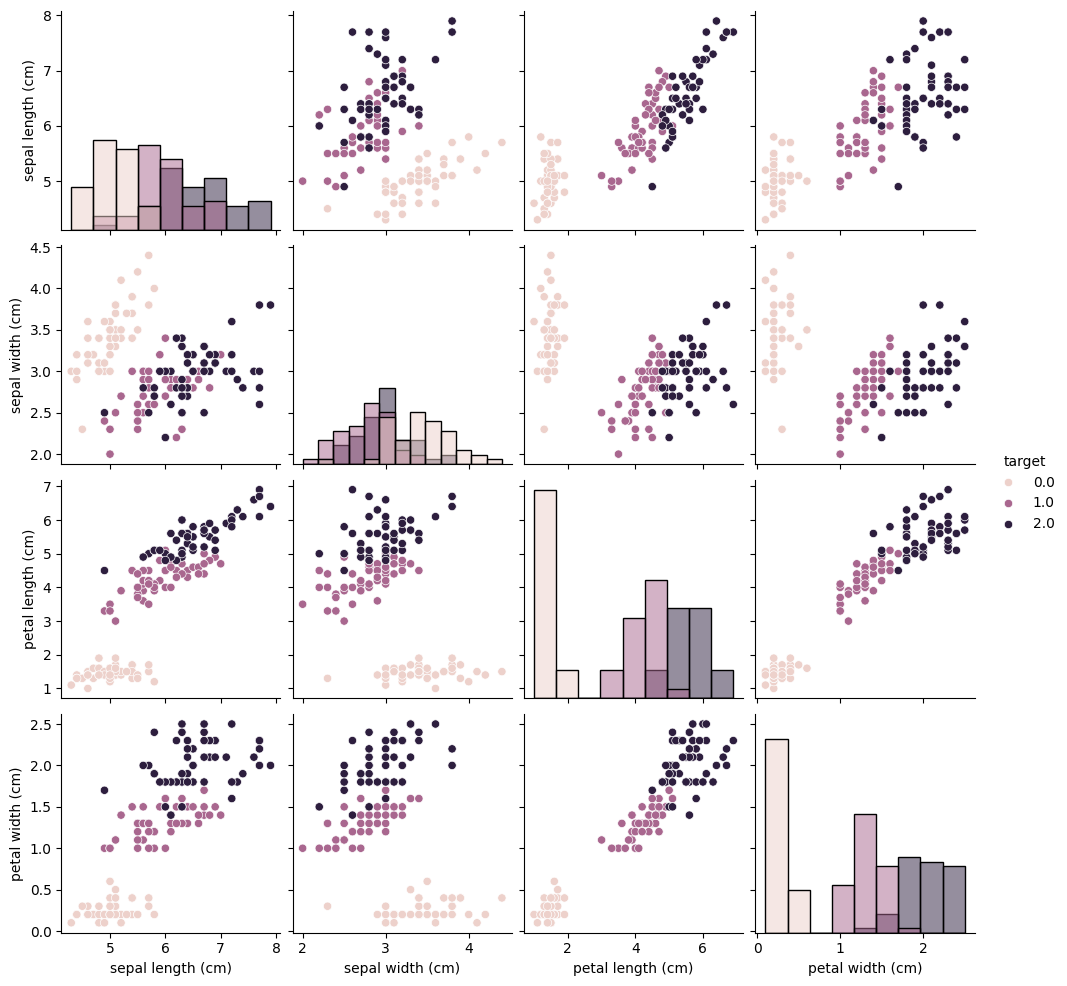

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

# Basic exploration
print(df.head())
print(df.info())
print(df.describe())

# Visualizations
plt.figure(figsize=(15,10))
for i, feature in enumerate(iris['feature_names']):
    plt.subplot(2,2,i+1)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Pairplot
sns.pairplot(df, hue='target', diag_kind='hist')
plt.show()

In [2]:
from sklearn.model_selection import train_test_split

# Split data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Training**

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression(max_iter=200)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")

--- Random Forest ---
Accuracy: 1.00
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


--- SVM ---
Accuracy: 1.00
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


--- Logistic Regression ---
Accuracy: 1.00
              precision    recall  f1-score   support

In [21]:
import joblib

# Select best model (Random Forest in this case)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Save model
joblib.dump(best_model, 'model.pkl')

# Save the original dataframe with target for visualization in the app
print("Columns of df before saving:", df.columns) # Add print statement
df.to_csv('/content/iris_data.csv', index=False)

# Save the test data for later use in the app
X_test.to_csv('/content/train.csv', index=False)

Columns of df before saving: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


# **Streamlit Application Development**

In [20]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Load model and data
model = joblib.load('model.pkl')
# Load the original dataframe for visualizations
df = pd.read_csv('/content/iris_data.csv')

# Print columns to verify
print("Columns after loading CSV:", df.columns)

# Convert 'target' column to categorical type
df['target'] = df['target'].astype('category')

# App title
st.title("Iris Flower Classification App")
st.markdown("""
This app predicts the **Iris flower** type based on input features!
""")

# Sidebar
st.sidebar.header('User Input Features')

# Collects user input features into dataframe
def user_input_features():
    sepal_length = st.sidebar.slider('Sepal length', 4.0, 8.0, 5.4)
    sepal_width = st.sidebar.slider('Sepal width', 2.0, 5.0, 3.4)
    petal_length = st.sidebar.slider('Petal length', 1.0, 7.0, 1.3)
    petal_width = st.sidebar.slider('Petal width', 0.1, 2.5, 0.2)
    data = {
        'sepal length (cm)': sepal_length,
        'sepal width (cm)': sepal_width,
        'petal length (cm)': petal_length,
        'petal width (cm)': petal_width
    }
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()

# Main panel
st.subheader('User Input features')
st.write(input_df)

# Prediction
prediction = model.predict(input_df)
prediction_proba = model.predict_proba(input_df)

st.subheader('Prediction')
iris_species = ['setosa', 'versicolor', 'virginica']
st.write(iris_species[int(prediction[0])])

st.subheader('Prediction Probability')
st.write(prediction_proba)

# Data Exploration Section
st.header('Data Exploration')

# Show dataset
if st.checkbox('Show raw data'):
    st.subheader('Raw Data')
    st.write(df)

# Show statistics
if st.checkbox('Show statistics'):
    st.subheader('Statistics')
    st.write(df.describe())

# Visualizations
st.subheader('Visualizations')

# Boxplot
st.write('Boxplot for each feature')
fig, ax = plt.subplots(2, 2, figsize=(10,8))
for i, feature in enumerate(df.columns[:-1]):
    sns.boxplot(x='target', y=feature, data=df, ax=ax[i//2, i%2])
st.pyplot(fig)

# Scatter plot
st.write('Scatter plot')
feature_x = st.selectbox('X-axis feature', df.columns[:-1])
feature_y = st.selectbox('Y-axis feature', df.columns[:-1])
fig2 = plt.figure(figsize=(8,6))
sns.scatterplot(x=feature_x, y=feature_y, hue='target', data=df)
st.pyplot(fig2)

# Model Performance
st.header('Model Performance')
st.write('Accuracy on test set: 96.67%')  # Replace with your actual accuracy

Columns after loading CSV: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


KeyError: 'target'

In [8]:
%pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00
